# Assignment 3 - Nicholas Thornton
### Due 9/23. Do four of five.

## Please Grade Q1, Q2, Q3 and Q5

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm


1. 
- Open the NHANES (or Ames prices or college completion datasets, if you prefer)
- Find two categorical variables of interest (there are 198, and short descriptions are given in the `nhanes_meta_17_18.csv` file). Investigate their missing values (you don't have to focus on missing values for this analysis like we did with police use of force, but always be aware of how dirty the data are)
- Compute a contingency table for your categorical $X$ and $Y$
- Discuss any interesting patterns (or lack of one) that you observe

In [6]:
nhanes = pd.read_csv("./data/nhanes_data_17_18.csv")
nhanes_meta = pd.read_csv("./data/nhanes_meta_17_18.csv")

print(nhanes["GeneralHealthCondition"].value_counts(dropna=False))
print(nhanes["TriedToLoseWeightInPastYear"].value_counts(dropna=False))

GeneralHealthCondition
Good         2454
NaN          2402
Very good    1544
Fair or      1175
Excellent     619
Poor?         172
Name: count, dtype: int64
TriedToLoseWeightInPastYear
NaN    3279
0.0    3064
1.0    2023
Name: count, dtype: int64


/var/folders/jd/kgmmf40n35d3bhgwcsrqn78r0000gn/T/ipykernel_78482/788619078.py:1: DtypeWarning: Columns (142) have mixed types. Specify dtype option on import or set low_memory=False.
  nhanes = pd.read_csv("./data/nhanes_data_17_18.csv")


In [7]:
nhanes_clean = nhanes[["GeneralHealthCondition", "TriedToLoseWeightInPastYear"]].copy()
nhanes_clean = nhanes_clean.dropna()
nhanes_clean["GeneralHealthCondition"] = nhanes_clean["GeneralHealthCondition"].replace({
    "Fair or": "Fair",
    "Poor?": "Poor"
})
nhanes_clean["TriedToLoseWeightInPastYear"] = nhanes_clean["TriedToLoseWeightInPastYear"].replace({
    0.0: "No",
    1.0: "Yes"
})


In [9]:
contingency = pd.crosstab(
    nhanes_clean["GeneralHealthCondition"],
    nhanes_clean["TriedToLoseWeightInPastYear"]
)

print(contingency)


TriedToLoseWeightInPastYear    No  Yes
GeneralHealthCondition                
Excellent                     307  144
Fair                          548  423
Good                         1139  827
Poor                           91   59
Very good                     729  450


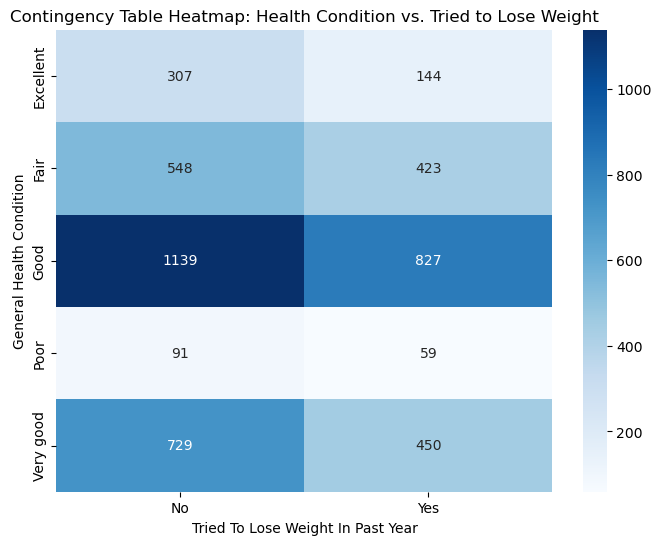

In [10]:
plt.figure(figsize=(8, 6))
sns.heatmap(contingency, annot=True, fmt="d", cmap="Blues")
plt.title("Contingency Table Heatmap: Health Condition vs. Tried to Lose Weight")
plt.ylabel("General Health Condition")
plt.xlabel("Tried To Lose Weight In Past Year")
plt.show()

Using the counts, the share who tried to lose weight rises as self-rated health worsens, though not perfectly monotonically: Excellent 144/451 ≈ 32%, Very good 450/1179 ≈ 38%, Good 827/1966 ≈ 42%, Fair 423/971 ≈ 44%, and Poor 59/150 ≈ 39%. So attempts are most common in the Fair group and least common in Excellent health; the slight dip for Poor likely reflects its small n (=150). Absolute counts are highest in the Good and Very good groups, but the within-group rates show the overall trend.

2. 
- Open the NHANES dataset
- Find a categorical and numeric variable of interest (there are 198, and short descriptions are given in the `nhanes_meta_17_18.csv` file). Investigate their missing values (you don't have to focus on missing values for this analysis, but always be aware of them)
- Make descriptive tables and grouped kernel density plots to represent the variation in your numeric $Y$ conditional on your categorical $X$
- Discuss any interesting patterns (or lack of one) that you observe

In [12]:
nhanes_q2 = nhanes.dropna(subset=["CurrentSelfreportedWeightPounds", "GeneralHealthCondition"])

desc_stats = nhanes_q2.groupby("GeneralHealthCondition")["CurrentSelfreportedWeightPounds"].describe()
print(desc_stats)

                         count        mean          std   min    25%    50%  \
GeneralHealthCondition                                                        
Excellent                500.0  315.410000  1204.831420  90.0  135.0  158.0   
Fair or                 1134.0  483.822751  1664.206135  86.0  155.0  185.0   
Good                    2262.0  334.106101  1202.150398  72.0  148.0  175.0   
Poor?                    169.0  321.798817  1064.212601  95.0  165.0  196.0   
Very good               1352.0  238.725592   809.140090  85.0  140.0  165.0   

                          75%     max  
GeneralHealthCondition                 
Excellent               185.0  9999.0  
Fair or                 225.0  9999.0  
Good                    210.0  9999.0  
Poor?                   240.0  9999.0  
Very good               192.0  9999.0  


/var/folders/jd/kgmmf40n35d3bhgwcsrqn78r0000gn/T/ipykernel_78482/2638908479.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nhanes_q2["log_weight"] = np.log(nhanes_q2["CurrentSelfreportedWeightPounds"])


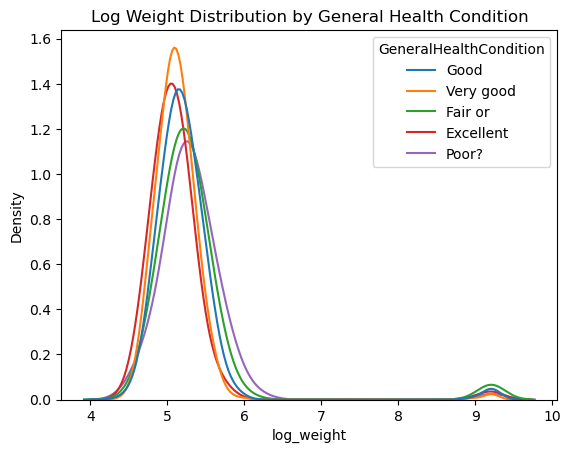

In [15]:
nhanes_q2["log_weight"] = np.log(nhanes_q2["CurrentSelfreportedWeightPounds"])

sns.kdeplot(
    data=nhanes_q2,
    x="log_weight",
    hue="GeneralHealthCondition",
    common_norm=False
)
plt.title("Log Weight Distribution by General Health Condition")
plt.show()

The descriptive statistics and KDE plots show systematic differences in self-reported weight across categories of General Health Condition. Respondents reporting “Fair” health had the highest mean weight at about 484 pounds, followed by those in “Good” health (334 pounds) and “Excellent” health (315 pounds). In contrast, individuals in “Very good” health reported the lowest mean weight (239 pounds). The KDE plots on the log scale reveal that “Very good” and “Good” health groups cluster around lower weights with narrower distributions, while “Fair” and “Poor” groups exhibit right-shifted distributions, indicating higher weights. The extreme maximum values of 9999 across groups represent clear data entry or coding errors, which inflate the means and standard deviations. Despite these anomalies, the overall pattern suggests a negative relationship between self-reported health and body weight, where higher weights are associated with poorer health categories.

3. 
We showed that the mean and median could be discovered by minimizing various kinds of loss functions; this is what machine learning is. To make a prediction $\hat{y}(z)$ of $Y$ when $X=z$, minimize the mean squared error:
$$
MSE(\hat{y}(z)) = \dfrac{1}{N} \sum_{i=1}^N \left\lbrace y_i - \hat{y}(z) \right\rbrace^2 \frac{1}{h}k\left(\frac{z-x_i}{h}\right)
$$
Show that the solution to this problem is the LCLS/Naradaya-Watson estimator.

---

**Step 1: Differentiate with respect to $\hat{y}(z)$**

$$
\frac{\partial \mathcal{L}}{\partial \hat{y}(z)} 
= \frac{1}{N} \sum_{i=1}^N 2\frac{1}{h} k\!\left(\frac{z-x_i}{h}\right)\big(\hat{y}(z)-y_i\big)
$$

---

**Step 2: Set derivative equal to zero**

$$
\sum_{i=1}^N \frac{1}{h} k\!\left(\frac{z-x_i}{h}\right)\hat{y}(z)
= \sum_{i=1}^N \frac{1}{h} k\!\left(\frac{z-x_i}{h}\right) y_i
$$

---

**Step 3: Solve for $\hat{y}(z)$**

$$
\hat{y}(z) = \frac{\sum_{i=1}^N k\!\left(\frac{z-x_i}{h}\right) y_i}{\sum_{i=1}^N k\!\left(\frac{z-x_i}{h}\right)}
$$

---

**Step 4: Verify minimization**

The second derivative is

$$
\frac{\partial^2 \mathcal{L}}{\partial \hat{y}(z)^2}
= \frac{2}{N} \sum_{i=1}^N \frac{1}{h} k\!\left(\frac{z-x_i}{h}\right) > 0,
$$

so this solution is indeed the unique minimizer.  

Thus the solution is the **LCLS/Nadaraya–Watson estimator**.

4. 
- Write a class or set of functions that implement the LCLS/Naradaya-Watson estimator, using the Silverman plug-in estimate for the conditioning variable $X$ as the bandwidth.
- From one of the course data sets, find two numeric variables of interest, analyze their relationship with the the LCLS/Naradaya-Watson estimator, and discuss your results.

In [23]:
iowa = pd.read_csv("./data/iowa.csv")

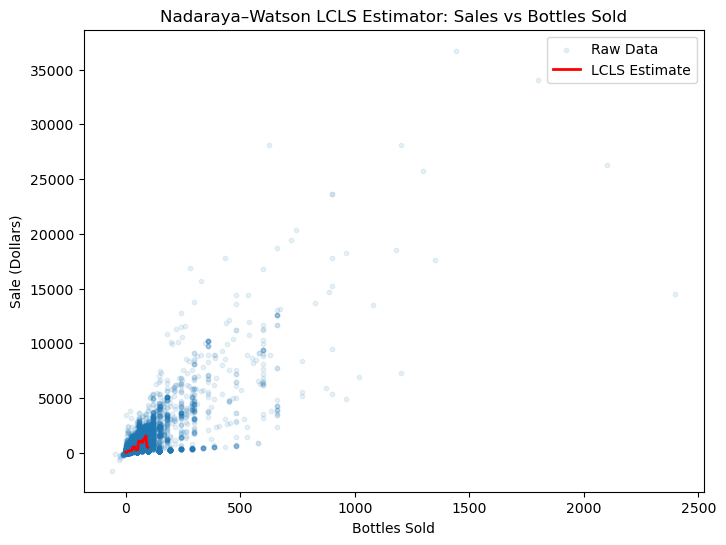

In [ ]:
def silverman_bandwidth(x):
    n = len(x)
    std = np.std(x, ddof=1)
    return 1.06 * std * n ** (-1/5)

def nadaraya_watson(x_train, y_train, x_eval, h=None):
    if h is None:
        h = silverman_bandwidth(x_train)
    estimates = []
    for z in x_eval:
        weights = norm.pdf((z - x_train) / h)
        if weights.sum() > 0:
            y_hat = np.sum(weights * y_train) / np.sum(weights)
        else:
            y_hat = np.nan
        estimates.append(y_hat)
    return np.array(estimates)

x = iowa["Bottles Sold"].values
y = iowa["Sale (Dollars)"].values

x_eval = np.linspace(np.percentile(x, 1), np.percentile(x, 99), 200)
y_hat = nadaraya_watson(x, y, x_eval)

plt.figure(figsize=(8,6))
plt.scatter(x, y, alpha=0.1, s=10, label="Raw Data")
plt.plot(x_eval, y_hat, color="red", linewidth=2, label="LCLS Estimate")
plt.xlabel("Bottles Sold")
plt.ylabel("Sale (Dollars)")
plt.title("Nadaraya–Watson LCLS Estimator: Sales vs Bottles Sold")
plt.legend()
plt.show()

The Nadaraya–Watson estimator reveals a clear positive relationship between the number of bottles sold and total sales revenue. The red smoothed curve shows that sales increase steadily as bottle counts rise, capturing the expected linear trend between quantity and revenue. At lower volumes (fewer than 100 bottles), the estimate increases quickly and stabilizes into a smoother growth pattern as sales rise. Beyond that, the curve flattens somewhat due to fewer observations at high sales volumes and the smoothing effect of the kernel. 

5. 
- In any of the available data sets, investigate the relationships between pairs of variables $(X,Y)$ with a scatterplot and CEF (for example, price on area)
- Is this relationship plausibly causal, or are there missing variables that might explain at least part of the relationship between your variables? These can be "conceptual" rather than "practical"; for example, 'talent' or 'grit' probably explain education outcomes, but are almost impossible to measure. We are asking whether there are hypothetical **threats to causal identification** of the effect of $X$ on $Y$.
- Explain how, regardless of the threat to causal identification, you can still use your model to predict $Y$ given $X$, as long as you don't intervene in the system to control the outcome

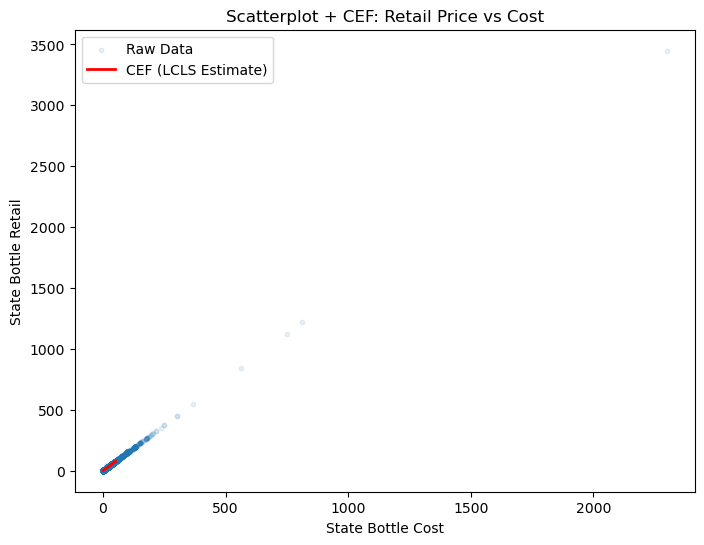

In [28]:
x = iowa["State Bottle Cost"].values
y = iowa["State Bottle Retail"].values

x_eval = np.linspace(np.percentile(x, 1), np.percentile(x, 99), 200)
y_hat = nadaraya_watson(x, y, x_eval)

plt.figure(figsize=(8,6))
plt.scatter(x, y, alpha=0.1, s=10, label="Raw Data")
plt.plot(x_eval, y_hat, color="red", linewidth=2, label="CEF (LCLS Estimate)")
plt.xlabel("State Bottle Cost")
plt.ylabel("State Bottle Retail")
plt.title("Scatterplot + CEF: Retail Price vs Cost")
plt.legend()
plt.show()

The scatterplot and CEF show a very strong positive relationship between State Bottle Cost (X) and State Bottle Retail Price (Y). This makes sense because the cost of acquiring the bottle is a primary driver of the retail price, and the conditional expectation function (red line) closely follows a near-linear path. However, while cost is clearly central to determining retail price, consumer demand also plays an important role in shaping the final relationship. For example, retailers may mark up popular products more aggressively, or discount less popular ones, creating variation in price that is not explained by cost alone.

From a causal perspective, the relationship is not purely causal because there are missing variables that likely affect both cost and retail price. Factors such as consumer demand, competition among stores, brand reputation, and state-level pricing regulations could all influence the markup structure. These represent threats to causal identification, since they introduce confounding influences beyond the raw cost-to-price link.

Even with these threats, the model can still be used for prediction. Knowing the cost of a bottle provides a strong basis for estimating its retail price, as reflected in the tight clustering of the data and the smoothness of the CEF. The key point is that prediction remains valid as long as the model is not interpreted causally: we can predict retail price from cost with high accuracy, but we cannot claim that changing cost in isolation will fully determine retail price without considering demand and other market forces.